### 调整超参数，观察模型训练结果

In [6]:
# 导包
import torch
import torch.nn as nn
from torchvision.datasets import KMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [7]:
# 参数初始化
BATCH_SIZE = 30
epochs = 20

#### 1、训练集初始化

In [8]:
# 加载训练数据集-((28*28),1)
train_data = KMNIST(root='./kdata', train=True, download=True, transform=ToTensor())
# 拆分训练数据集 30个一个批次，每个有其对应的真实标签
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE)

# 加载测试数据集
test_data = KMNIST(root='./kdata', train=False, download=True, transform=ToTensor())
# 拆分测试数据集
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

#### 2、定义迭代训练函数

In [9]:
def train_iter(epochs, model, train_dl, lr):
    train_hist = []
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        # 循环处理每个批次中的图像
        for x, y in train_dl:
            y_hat = model(x.reshape(-1, 784))
            # print(x.shape) # torch.Size([30, 1, 28, 28])
            # print(y.shape) # torch.Size([30])
            # print(y_hat.shape) # torch.Size([30, 10])
            # y_hat 30行10列 每个图片对应的概率分布 
            # (30, 10) (30)
            loss = loss_fn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch:{epoch} Loss: {loss.item()}')
        train_hist.append(loss.item())
    return train_hist
            

#### 3、定义历史梯度画像函数

In [10]:
import matplotlib.pyplot as plt
def draw_train_hist(hist_list):
    for i, hist in enumerate(hist_list):   
        plt.plot(hist, label=f'Loss{i}')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.title("Training Loss")
    plt.show()

#### 4、定义测试验证函数

In [11]:
def test_acc(test_dl, model):
    total = 0
    correct = 0
    with torch.no_grad():
        for x,y in test_dl:
            y_hat = model(x.reshape(-1, 784)) 
            # y_hat(30, 10) y(30) 
            max_val, max_idx = torch.max(y_hat, 1)
            total += y_hat.size(0)
            correct += (max_idx == y).sum().item()
    print(f'Accuracy: {correct / total}')
    return correct/total*100

In [12]:
# 生成3个模型
models = torch.nn.ModuleList([
    nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)) for _ in range(3)
])

#### 5、训练模型

In [13]:
train_hist = [train_iter(epochs, model, train_dl, lr=lr) for model, lr in zip(models, [0.1, 0.01, 0.001])]

Epoch:0 Loss: 0.10967354476451874
Epoch:1 Loss: 0.07576639950275421
Epoch:2 Loss: 0.03872103616595268
Epoch:3 Loss: 0.03357775881886482
Epoch:4 Loss: 0.01826171949505806
Epoch:5 Loss: 0.00965352077037096
Epoch:6 Loss: 0.005844252184033394
Epoch:7 Loss: 0.0075210765935480595
Epoch:8 Loss: 0.0024882997386157513
Epoch:9 Loss: 0.0013708281330764294
Epoch:10 Loss: 0.0014511964982375503
Epoch:11 Loss: 0.0013490307610481977
Epoch:12 Loss: 0.001116961007937789
Epoch:13 Loss: 0.0009326605359092355
Epoch:14 Loss: 0.0008056087535806
Epoch:15 Loss: 0.0007140791858546436
Epoch:16 Loss: 0.0006456066039390862
Epoch:17 Loss: 0.0005851628957316279
Epoch:18 Loss: 0.0005368629936128855
Epoch:19 Loss: 0.0004936089389957488
Epoch:0 Loss: 0.5644519925117493
Epoch:1 Loss: 0.37381941080093384
Epoch:2 Loss: 0.29707446694374084
Epoch:3 Loss: 0.2390262633562088
Epoch:4 Loss: 0.1898880898952484
Epoch:5 Loss: 0.15295319259166718
Epoch:6 Loss: 0.12820185720920563
Epoch:7 Loss: 0.11108648031949997
Epoch:8 Loss: 0.09

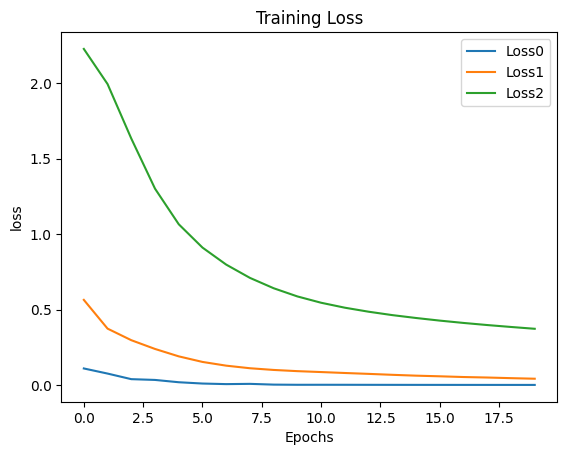

In [14]:
draw_train_hist(train_hist)

#### 6、测试模型

In [15]:
for i in range(len(models)):
    print(f'Model{i+1} Acc:', test_acc(test_dl, models[i]))
    torch.save(models[i].state_dict(), f'model{i+1}.pth')

Accuracy: 0.9174
Model1 Acc: 91.74
Accuracy: 0.8919
Model2 Acc: 89.19
Accuracy: 0.7317
Model3 Acc: 73.17


### 观察不同batch_size 训练结果

In [16]:
models = torch.nn.ModuleList([
    nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)) for _ in range(3)
])

In [17]:
train_datas = [DataLoader(train_data, batch_size=bs, shuffle=True) for bs in [128, 256, 512]]

train_hist = [train_iter(epochs, model, dl, lr=0.01) for model, dl in zip(models, train_datas)]

Epoch:0 Loss: 1.8833494186401367
Epoch:1 Loss: 1.0501060485839844
Epoch:2 Loss: 0.8333804607391357
Epoch:3 Loss: 0.7018557190895081
Epoch:4 Loss: 0.7950863838195801
Epoch:5 Loss: 0.39236822724342346
Epoch:6 Loss: 0.4992702901363373
Epoch:7 Loss: 0.4457486569881439
Epoch:8 Loss: 0.4921264350414276
Epoch:9 Loss: 0.5160471200942993
Epoch:10 Loss: 0.39119815826416016
Epoch:11 Loss: 0.38244226574897766
Epoch:12 Loss: 0.4053395688533783
Epoch:13 Loss: 0.41905081272125244
Epoch:14 Loss: 0.39400622248649597
Epoch:15 Loss: 0.3148464858531952
Epoch:16 Loss: 0.2732016146183014
Epoch:17 Loss: 0.2800649106502533
Epoch:18 Loss: 0.2584814727306366
Epoch:19 Loss: 0.17045807838439941
Epoch:0 Loss: 2.1884214878082275
Epoch:1 Loss: 1.901779294013977
Epoch:2 Loss: 1.390428066253662
Epoch:3 Loss: 0.9797783493995667
Epoch:4 Loss: 0.882986843585968
Epoch:5 Loss: 0.7096855044364929
Epoch:6 Loss: 0.5920249819755554
Epoch:7 Loss: 0.7198165059089661
Epoch:8 Loss: 0.523399293422699
Epoch:9 Loss: 0.702469766139984

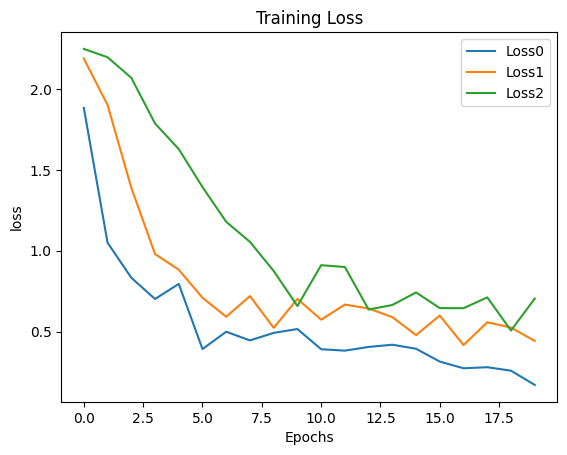

In [18]:
draw_train_hist(train_hist)

In [19]:
for i in range(len(models)):
    print(f'Model{i+1} Acc:', test_acc(test_dl, models[i]))
    torch.save(models[i].state_dict(), f'model{i+1}.pth')

Accuracy: 0.8072
Model1 Acc: 80.72
Accuracy: 0.7488
Model2 Acc: 74.88
Accuracy: 0.682
Model3 Acc: 68.2
